In [1]:
import umap.plot
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
import seaborn as sns

/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-22 12:12:41.202028: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 12:12:41.204667: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 12:12:41.237392: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 12:12:57.325950: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find Tensor



Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




In [2]:
n_channel = 96
model_dir = "/home/sheida.rahnamai/GIT/HDN/examples/Pixel_Noise/Convallaria/Contrastive_new_dataloader/model/"
mus = np.array([])
mu_golgi = np.load(model_dir+'mu_golgi.npy')
mu_mitochondria = np.load(model_dir+'mu_mitochondria.npy')
mu_granule = np.load(model_dir+'mu_granule.npy')
print(mu_golgi.shape)
print(mu_mitochondria.shape)
print(mu_granule.shape)

(19, 96)
(161, 96)
(363, 96)


In [3]:

mus = np.append(mus, mu_golgi).reshape(-1, n_channel)
print(mus.shape)
mus = np.append(mus, mu_mitochondria).reshape(-1,n_channel)
print(mus.shape)
mus = np.append(mus, mu_granule).reshape(-1,n_channel)
print(mus.shape)



(19, 96)
(180, 96)
(543, 96)


In [4]:
labels = ['Golgi'] * 19
for i in range(161):
    labels.append('Mitochondria')
for i in range(363):
    labels.append('Granule')
print(type(labels))
labels = np.asarray(labels)
print(type(labels))

<class 'list'>
<class 'numpy.ndarray'>


/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

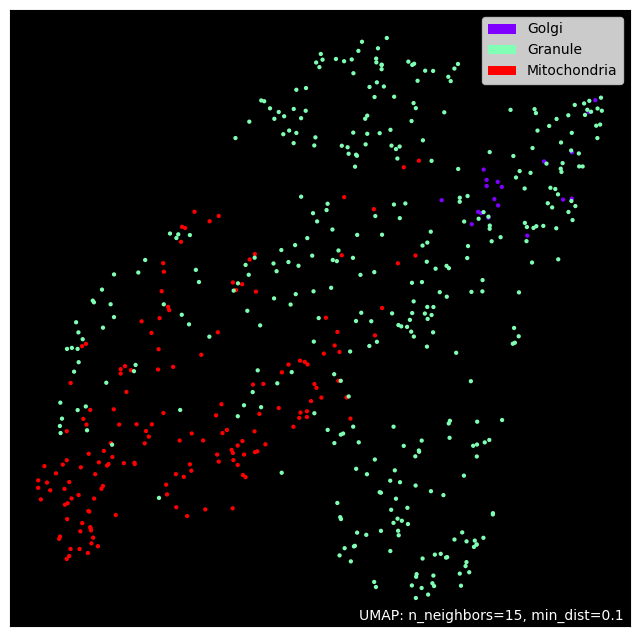

In [14]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit(mus)
umap.plot.points(embedding, labels=labels, color_key_cmap='Paired', background='black', theme='fire')


In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [ ]:

reducer = Isomap(n_components=2, metric='euclidean')
# reducer = TSNE(n_components=2, learning_rate='auto', init='random', metric='cosine', n_iter= 10000, n_iter_without_progress=500).fit_transform(mus)
# reducer = Isomap(n_components=2, metric='cosine')
# reducer = cvae.CompressionVAE(mus)
# reducer.train()
# embedding = reducer.embed(mus)
embedding = reducer.fit_transform(mus)
print(embedding.shape)


In [ ]:

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.scatter(embedding[:738,0], embedding[:738,1], c='purple', s=5, label='Golgi', alpha=1, edgecolors='none')
ax.scatter(embedding[738:1858,0], embedding[738:1858,1], c='lightgreen', s=5, label='Mitochondria', alpha=1, edgecolors='none')
ax.scatter(embedding[1858:,0], embedding[1858:,1], c='red', s=5, label='Granule', alpha=1, edgecolors='none')


ax.legend()
ax.grid(True)
plt.gca().set_aspect('equal', 'datalim')
plt.show()

In [ ]:
x_min = 0
x_max = 0.1
y_min = 0
y_max = 0.1
x_filter = np.logical_and(embedding[:,0] > x_min, embedding[:,0] < x_max)
y_filter = np.logical_and(embedding[:,1] > y_min, embedding[:,1] < y_max)
filter_ = np.logical_and(x_filter, y_filter)
# list of indices where the filter is True
filtered_indices = np.where(filter_)[0]


In [ ]:
from tifffile import imread
data_dir = "/group/jug/Sheida/pancreatic beta cells/download/high_c1/contrastive/patches/"
golgi = imread(data_dir+'golgi/*.tif')
mitochondria = imread(data_dir+'mitochondria/*.tif')
granule = imread(data_dir+'granules/*.tif')
all_data = np.concatenate([golgi, mitochondria, granule],axis=0)


In [ ]:
embedding[filtered_indices]

In [ ]:
import matplotlib.pyplot as plt
idx1 = 10
idx2 = 11
idx3 = 12
print(embedding[
    [filtered_indices[idx1], filtered_indices[idx2], filtered_indices[idx3]]
    ])
_,ax = plt.subplots(figsize=(9,3),ncols=3)
ax[0].imshow(all_data[filtered_indices[idx1]])
ax[1].imshow(all_data[filtered_indices[idx2]])
ax[2].imshow(all_data[filtered_indices[idx3]])
print(np.unique(all_data[filtered_indices[idx1]] - all_data[filtered_indices[idx2]]))
all_data.shape

In [ ]:
embedding[filter_]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
embedding = pca.fit_transform(mus)
print(mus.shape)
print(embedding.shape)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_figheight(10)
fig.set_figwidth(10)
ax.scatter(embedding[:738,0], embedding[:738,1], c='purple', s=20, label='Golgi', alpha=1, edgecolors='none')
ax.scatter(embedding[738:1858,0], embedding[738:1858,1], c='lightgreen', s=20, label='Mitochondria', alpha=1, edgecolors='none')
ax.scatter(embedding[1858:,0], embedding[1858:,1], c='red', s=20, label='Granule', alpha=1, edgecolors='none')


ax.legend()
ax.grid(True)
plt.gca().set_aspect('equal', 'datalim')
plt.show()